# Step #1 Load the Data

In [1]:
# A tutorial for this file is available at www.relataly.com
# Tested with Python 3.9.13, Matplotlib 3.6.2, Scikit-learn 1.2, Seaborn 0.12.1, numpy 1.21.5

# import necessary libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from pandas.api.types import is_string_dtype
import numpy as np
import pandas as pd
import math
import seaborn as sns

# load customer data
customer_df = pd.read_csv("data/customer/customer_health_insurance.csv")
customer_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# Step #2 Explore the Data

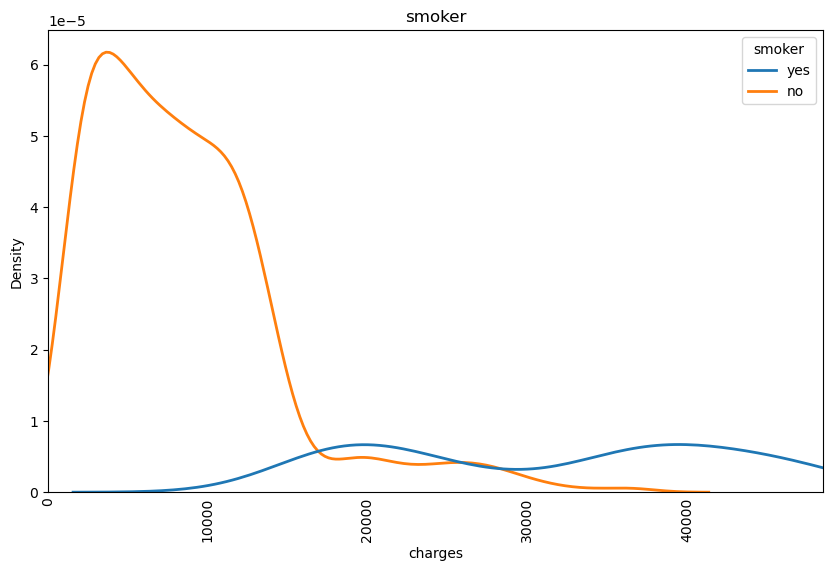

In [2]:
def make_kdeplot(df, column_name, target_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=df, hue=column_name, x=target_name, ax = ax, linewidth=2,)
    ax.tick_params(axis="x", rotation=90, labelsize=10, length=0)
    ax.set_title(column_name)
    ax.set_xlim(0, df[target_name].quantile(0.99))
    plt.show()

# make kde plot for ext_color 
make_kdeplot(customer_df, 'smoker', 'charges')

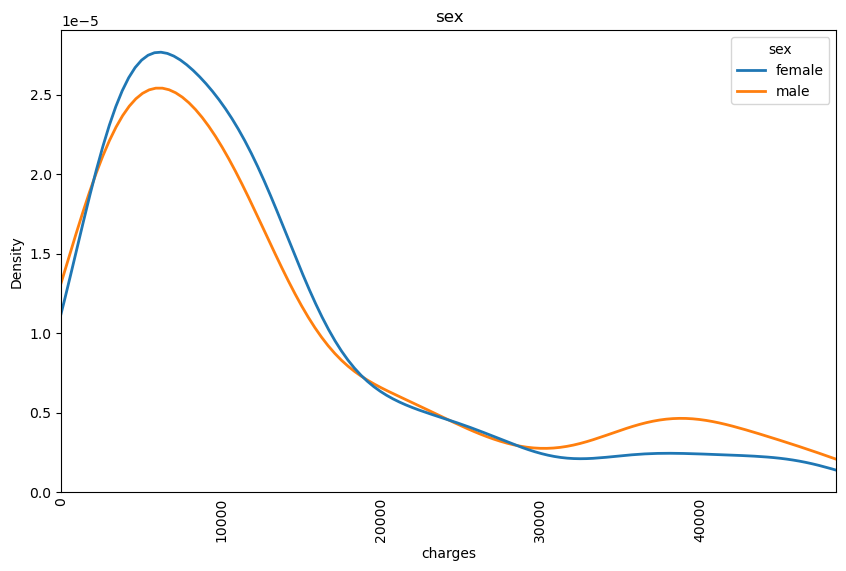

In [3]:
# make kde plot for ext_color 
make_kdeplot(customer_df, 'sex', 'charges')

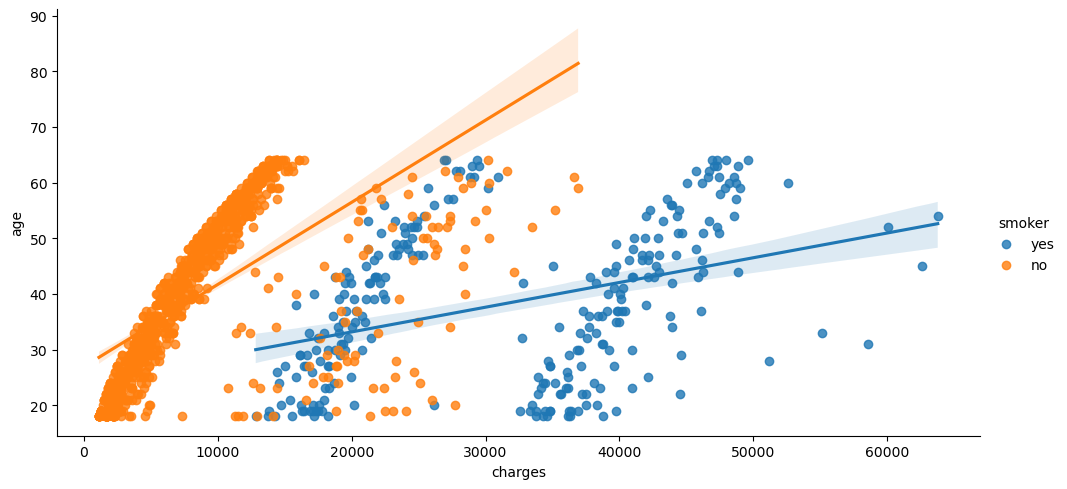

In [4]:
sns.lmplot(x="charges", y="age", hue="smoker", data=customer_df, aspect=2)
plt.show()

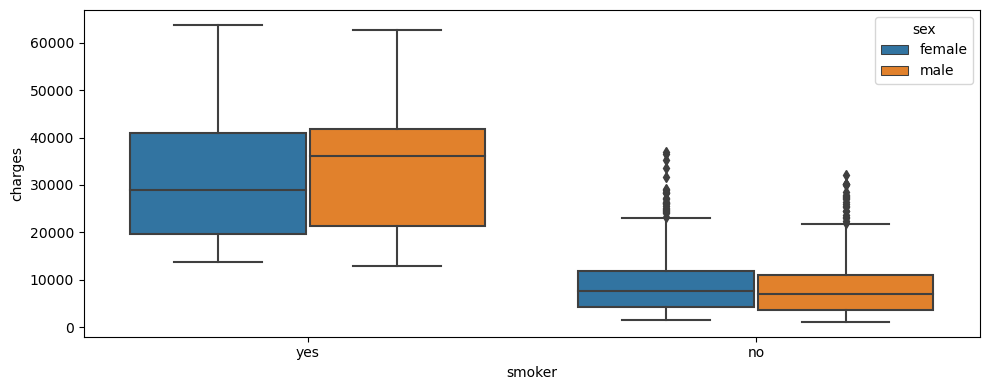

In [5]:
def make_boxplot(customer_df, x,y,h):
    fig, ax = plt.subplots(figsize=(10,4))
    box = sns.boxplot(x=x, y=y, hue=h, data=customer_df)
    box.set_xticklabels(box.get_xticklabels())
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

make_boxplot(customer_df, "smoker", "charges", "sex")

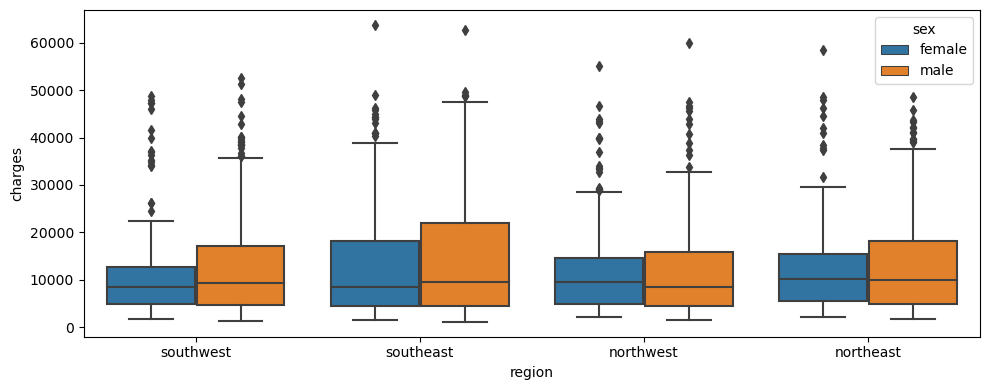

In [6]:
make_boxplot(customer_df, "region", "charges", "sex")

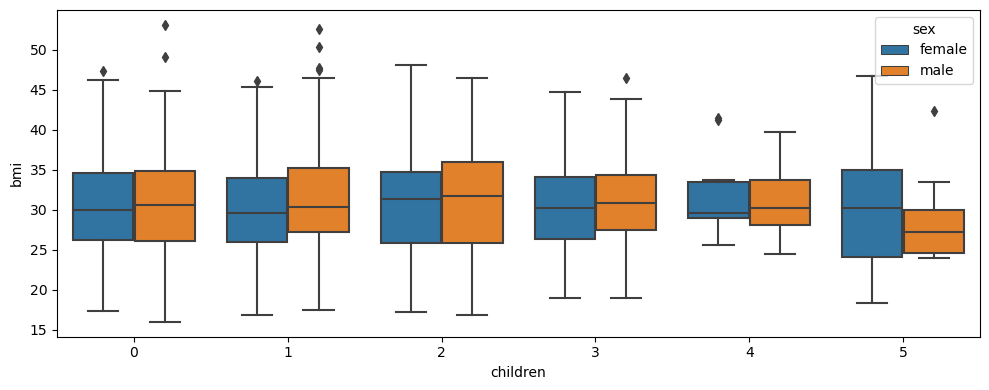

In [7]:
make_boxplot(customer_df, "children", "bmi", "sex")

# Step #3 Prepare the Data

In [8]:
# encode categorical features
label_encoder = LabelEncoder()

for col_name in customer_df.columns:
    if (is_string_dtype(customer_df[col_name])):
        customer_df[col_name] = label_encoder.fit_transform(customer_df[col_name])
customer_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [9]:
# select features
X = customer_df # we will select all features

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.43876426, -1.0105187 , -0.45332   , ...,  1.97058663,
         1.34390459,  0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.5074631 ,
         0.43849455, -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.5074631 ,
         0.43849455, -0.72867467],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.5074631 ,
         0.43849455, -0.96159623],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.5074631 ,
         1.34390459, -0.93036151],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.97058663,
        -0.46691549,  1.31105347]])

# Step #4 Train a Hierarchical Clustering Model

In [23]:
# apply hierarchical clustering 
cluster_model = AgglomerativeClustering(distance_threshold=40, n_clusters=None)
predicted_segments = cluster_model.fit_predict(X_scaled)

# Step #5 Visualize the Results

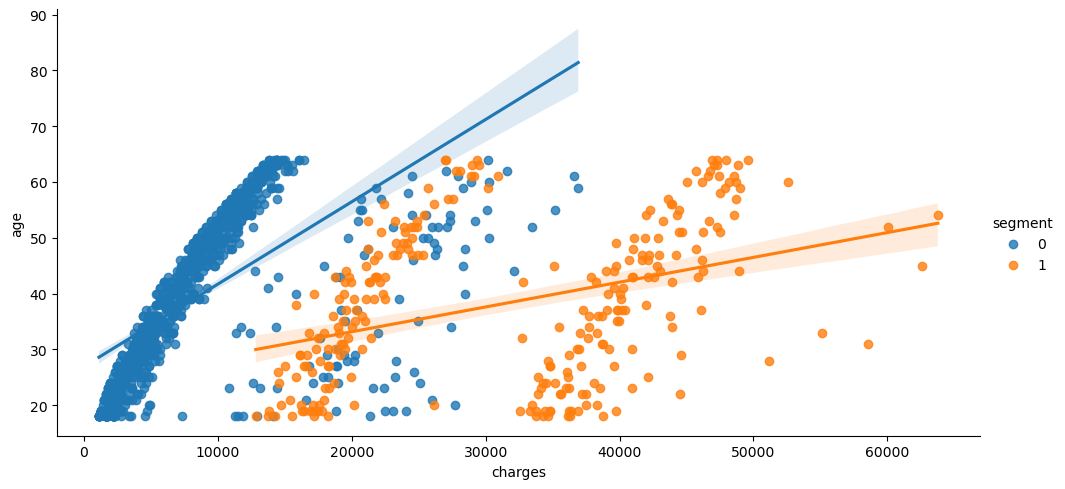

In [24]:
# add predictions to data as a new column
customer_df['segment'] = predicted_segments

# create a scatter plot of the first two features, colored by segment
sns.lmplot(x="charges", y="age", hue="segment", data=customer_df, aspect=2)
plt.show()

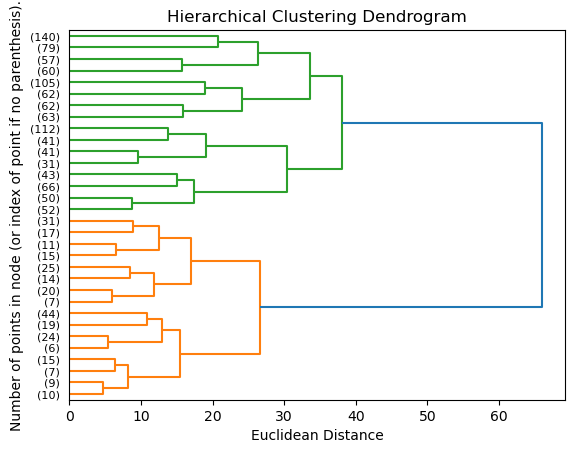

In [101]:
# Visualize data similarity in a dendogram
def plot_dendrogram(model, **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, orientation='right',**kwargs)


plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(cluster_model, truncate_mode="level", p=4)
plt.xlabel("Euclidean Distance")
plt.ylabel("Number of points in node (or index of point if no parenthesis).")
plt.show()